In [89]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

# remove warning
import warnings
warnings.filterwarnings(action='ignore')

np.random.seed(42) # random_state is globally imported 

    | Note: 
Train and test are absent in unsupervised ML. train and test are possible when we know the target value or output.

In Unsupervised ML the model is evaluated, how much effective or meaningful  the model is

# Step-1: Data gathering

In [90]:
data=pd.read_csv('Data/Mall_Customers.csv',index_col='CustomerID')
df=data.copy()
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


# Step-2:  Data Preprocessing

In [91]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [92]:
df.nunique().sort_values(ascending=False)

Spending Score (1-100)    84
Annual Income (k$)        64
Age                       51
Gender                     2
dtype: int64

In [93]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

df.Gender=encoder.fit_transform(df.Gender)
#encoder.inverse_transform(df.Gender.values) # inverse transformation of Gender values type
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40


In [94]:
# OR
# df.Gender=df.Gender.astype('category').cat.codes # converted Gender column object to category type

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  200 non-null    int32
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int32(1), int64(3)
memory usage: 7.0 KB


# Step-3: EDA

In [96]:
gender=df.Gender.value_counts()
gender

0    112
1     88
Name: Gender, dtype: int64

In [97]:
# Checking index
gender.index
encoder.inverse_transform(gender.index) # inverse transfrm

array(['Female', 'Male'], dtype=object)

<AxesSubplot:>

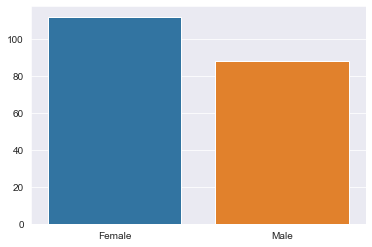

In [98]:
sns.set_style(style='darkgrid')
sns.barplot(x=['Fimale','Male'],y=gender.values) # or
sns.barplot(x=encoder.inverse_transform(gender.index),y=gender.values)

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Count'>

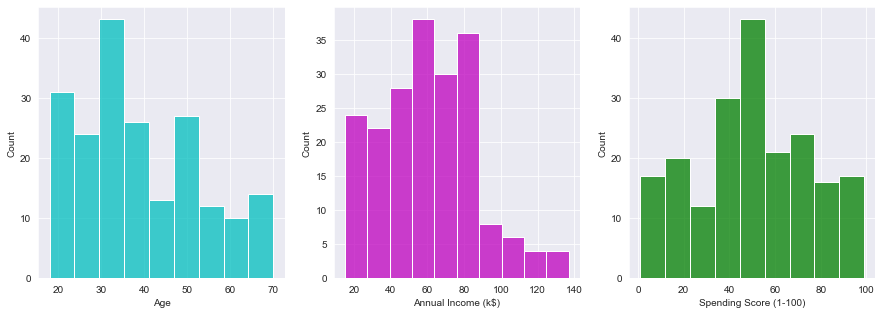

In [99]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.histplot(data=df, x='Age',color='c')

plt.subplot(1,3,2)
sns.histplot(data=df,x='Annual Income (k$)',color='m' )

plt.subplot(1,3,3)
sns.histplot(data=df, x='Spending Score (1-100)', color='green')

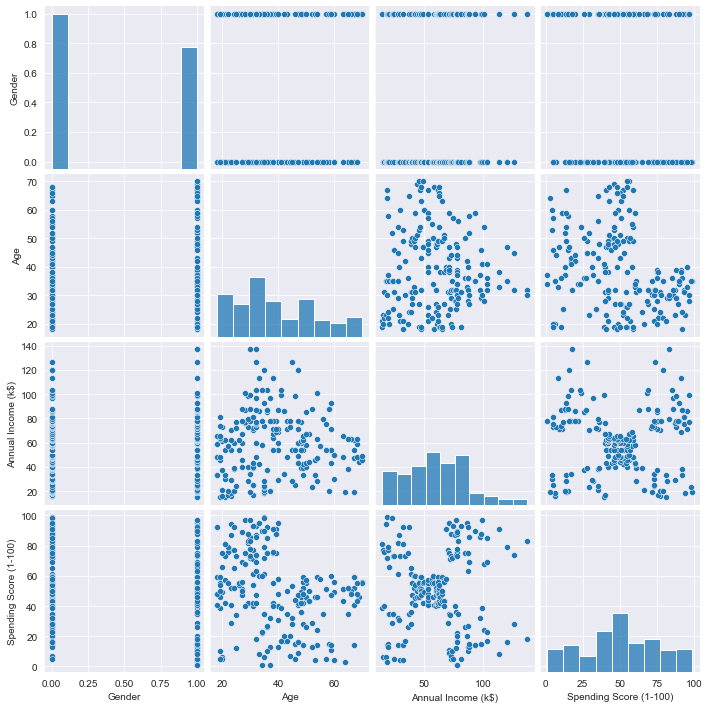

In [100]:
sns.pairplot(df)

    | Scaling

In [101]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [102]:
scaled_data=scaler.fit_transform(df.drop(columns=['Gender',]))
scaled_data

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

In [103]:
df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]=scaled_data
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1,-1.424569,-1.738999,-0.434801
2,1,-1.281035,-1.738999,1.195704
3,0,-1.352802,-1.700830,-1.715913
4,0,-1.137502,-1.700830,1.040418
5,0,-0.563369,-1.662660,-0.395980
...,...,...,...,...
196,0,-0.276302,2.268791,1.118061
197,0,0.441365,2.497807,-0.861839
198,1,-0.491602,2.497807,0.923953


# Step-4: Clustering

# <font color ='blue'> KMeans Clustering  </font>

In [104]:
from sklearn.cluster import KMeans
cluster=KMeans()

In [105]:
cluster.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']]) # fitted/train the model

KMeans()

In [106]:
cluster.cluster_centers_  # getting the center postion of each cluster of Annual Income (k$) and Spending Score (1-100) 

array([[-1.35185213, -1.19089759],
       [ 0.03367718, -0.08242116],
       [ 0.75632724,  1.27092084],
       [-1.35921337,  1.19570407],
       [ 0.73088095, -1.39401754],
       [ 1.87564575, -1.09476801],
       [-0.62198207,  0.04247535],
       [ 2.06703817,  1.0958772 ]])

In [107]:
cluster.get_params() # return number of parameter

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 8,
 'n_init': 10,
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [108]:
cluster.n_clusters # return number of cluster

8

In [109]:
cluster.inertia_ # it  is the inner varience inside each cluster, we have to minimise this value
# minimum inertia value refers that the cluster is more better than previous

37.7364034625416

    | Finding K and Elbow method

In [110]:

inertia=np.array([[0,0]]) # first one refers number of K and other one refers the value of inertiafor that k 
for k in range(2,11):
    kcluster=KMeans(n_clusters=k)
    kcluster.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia=np.append(inertia,[[k,kcluster.inertia_]],axis=0)


In [111]:
inertia

array([[  0.        ,   0.        ],
       [  2.        , 269.01679375],
       [  3.        , 157.70400815],
       [  4.        , 108.92131661],
       [  5.        ,  65.56840816],
       [  6.        ,  55.05734827],
       [  7.        ,  44.91118555],
       [  8.        ,  37.18028799],
       [  9.        ,  32.37724377],
       [ 10.        ,  29.061153  ]])

<AxesSubplot:>

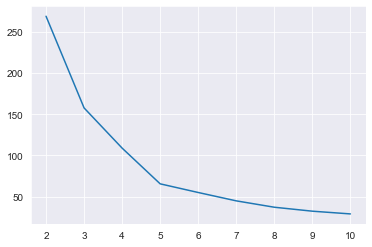

In [112]:
sns.lineplot(x=inertia[1:,0],y=inertia[1:,1])

Here, Five (5) refers the elbow point, so five is the best number of cluster value

# Step-5: Visualizing Cluster

In [113]:
# again train the model using K=5
cluster=KMeans(n_clusters=5) 
cluster.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])

KMeans(n_clusters=5)

In [114]:
predicted_value=cluster.predict(df[['Annual Income (k$)', 'Spending Score (1-100)']])
predicted_value # predicted value of each custermer

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 4, 1, 4, 2, 4, 2, 4,
       1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4])

In [115]:
data['Cluster']=predicted_value # predicter values asign to the dataframe
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
CustomerID,,,,,
1,Male,19,15,39,3
2,Male,21,15,81,0
3,Female,20,16,6,3
4,Female,23,16,77,0
5,Female,31,17,40,3


In [116]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

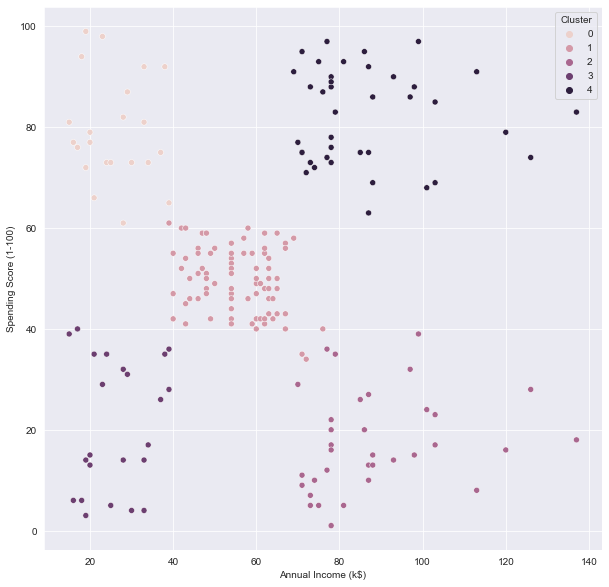

In [117]:
plt.figure(figsize=(10,10)) # drowing Scatterplot for each cluster
sns.scatterplot(data=data, x='Annual Income (k$)',y='Spending Score (1-100)',hue='Cluster' )

    | Validation 

In [118]:
from sklearn.metrics import silhouette_score

In [119]:
# measuring cluster accuracy which range (-1, 1). so negative score means bad clustering
silhouette_score(data[['Annual Income (k$)', 'Spending Score (1-100)']],data['Cluster'])

0.553931997444648

# <font color ='blue'> Agglomerative </font>

    | Agglomerative Clustering.
Recursively merges pair of clusters of sample data; uses linkage distance.

Parameters
    | n_clusters : int or None, default=2
The number of clusters to find. It must be None if distance_threshold is not None.

    | affinity : str or callable, default='euclidean' ( distance calculation)
Metric used to compute the linkage. Can be "euclidean", "l1", "l2", "manhattan", "cosine", or "precomputed". If linkage is "ward", only "euclidean" is accepted. If "precomputed", a distance matrix (instead of a similarity matrix) is needed as input for the fit method.

    | compute_full_tree : 'auto' or bool, default='auto' (print the tree bottom to up)
Stop early the construction of the tree at n_clusters. This is useful to decrease computation time if the number of clusters is not small compared to the number of samples. This option is useful only when specifying a connectivity matrix. Note also that when varying the number of clusters and using caching, it may be advantageous to compute the full tree. 

    | linkage : {'ward', 'complete', 'average', 'single'}, default='ward'

(whether distane between two cluster remain little, ward merge their) 

Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.

1. 'ward' minimizes the variance of the clusters being merged.
2. 'average' uses the average of the distances of each observation of the two sets.
3. 'complete' or 'maximum' linkage uses the maximum distances between all observations of the two sets.
4. 'single' uses the minimum of the distances between all observations of the two sets.






In [120]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples # return information for each sample

In [121]:
agg=AgglomerativeClustering()
agg.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])

AgglomerativeClustering()

In [122]:
predicted_value=agg.fit_predict(df[['Annual Income (k$)', 'Spending Score (1-100)']])
predicted_value

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int64)

In [123]:
df['cluster'] =predicted_value
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
CustomerID,,,,,
1,1,-1.424569,-1.738999,-0.434801,0
2,1,-1.281035,-1.738999,1.195704,0
3,0,-1.352802,-1.700830,-1.715913,0
4,0,-1.137502,-1.700830,1.040418,0
5,0,-0.563369,-1.662660,-0.395980,0


In [124]:
# accuracy score
silhouette_score(df[['Annual Income (k$)', 'Spending Score (1-100)']],df['cluster'])

0.3842337621772661

In [125]:
# Return sample score of all data points individually.
ssample=silhouette_samples(df[['Annual Income (k$)', 'Spending Score (1-100)']],df['cluster'])
ssample

array([ 0.43641683,  0.18292505,  0.43343987,  0.21721392,  0.44151319,
        0.22484583,  0.43825497,  0.05262379,  0.43357458,  0.25811483,
        0.45521338,  0.00314701,  0.4592845 ,  0.20980501,  0.45631352,
        0.18978896,  0.46622415,  0.30907808,  0.47764846, -0.01768692,
        0.47660394,  0.24000758,  0.44940099,  0.23712681,  0.47512178,
        0.11538119,  0.49199365,  0.35399802,  0.49509689,  0.04516001,
        0.45311022,  0.21657731,  0.45548902, -0.0576032 ,  0.48210717,
        0.08462477,  0.48964349,  0.19155346,  0.50771544,  0.13384188,
        0.51201573, -0.12151643,  0.51253778,  0.33944588,  0.51162104,
        0.27949582,  0.41317532,  0.48010501,  0.50246842,  0.50246842,
        0.443113  ,  0.34282557,  0.42102231,  0.33810549,  0.49309108,
        0.50736893,  0.45997241,  0.48794325,  0.44758619,  0.4862914 ,
        0.38566226,  0.39991485,  0.43396677,  0.33049381,  0.44137183,
        0.32264358,  0.45159205,  0.46894691,  0.32264358,  0.47

In [126]:
# checking ssample & sscore using user define number of clusters
for k in range(2,9):
    agg=AgglomerativeClustering(n_clusters=k)
    df['cluster']=agg.fit_predict(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    sscore=silhouette_score(df[['Annual Income (k$)', 'Spending Score (1-100)']],df['cluster'])
    ssample=silhouette_samples(df[['Annual Income (k$)', 'Spending Score (1-100)']],df['cluster'])
    print(sscore)
    print(ssample) # Return sample score of all data points individually.
    break # sample score value negative means that data point remain wrong cluster

0.3842337621772661
[ 0.43641683  0.18292505  0.43343987  0.21721392  0.44151319  0.22484583
  0.43825497  0.05262379  0.43357458  0.25811483  0.45521338  0.00314701
  0.4592845   0.20980501  0.45631352  0.18978896  0.46622415  0.30907808
  0.47764846 -0.01768692  0.47660394  0.24000758  0.44940099  0.23712681
  0.47512178  0.11538119  0.49199365  0.35399802  0.49509689  0.04516001
  0.45311022  0.21657731  0.45548902 -0.0576032   0.48210717  0.08462477
  0.48964349  0.19155346  0.50771544  0.13384188  0.51201573 -0.12151643
  0.51253778  0.33944588  0.51162104  0.27949582  0.41317532  0.48010501
  0.50246842  0.50246842  0.443113    0.34282557  0.42102231  0.33810549
  0.49309108  0.50736893  0.45997241  0.48794325  0.44758619  0.4862914
  0.38566226  0.39991485  0.43396677  0.33049381  0.44137183  0.32264358
  0.45159205  0.46894691  0.32264358  0.47616457  0.38383433  0.49823792
  0.45285238  0.3601642   0.44870319  0.35831126  0.37506815  0.43932053
  0.39042737  0.48028024  0.40442

The matplotlib.pyplot.fill_between() is used to fill area between two horizontal curves. Two points (x, y1) and (x, y2) define the curves. this creates one or more polygons describing the filled areas. The ‘where’ parameter can be used to selectively fill some areas.

1. x: It is array of length N. These are the y coordinates of the nodes that define the curves.
2. y1:It is an array of length N or a scalar. This represents the x coordinates of the nodes that define the first curve.
3. y2: It is an array of length N and is optional in nature. Its default value is 0. This represents the x coordinates of the nodes that define the second curve.


    | parameters evaluation

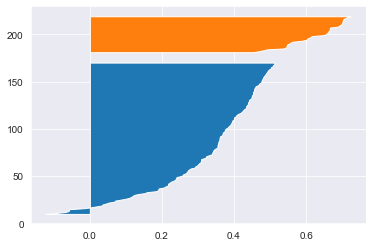

In [127]:
# evaluating model using by defoult cluster
ylow =10
for cluster in range(agg.n_clusters):
    cluster_samples = ssample[df['cluster'] == cluster]
    cluster_samples.sort()
    yup =  ylow+ cluster_samples.shape[0]
    plt.fill_betweenx(np.arange(ylow, yup),0, cluster_samples) # np.arange(ylow, yup refers value of y and cluster_samples refers value of x
    ylow = yup+10
plt.show()

n_clusters: 2 & sscore: 0.3842337621772661


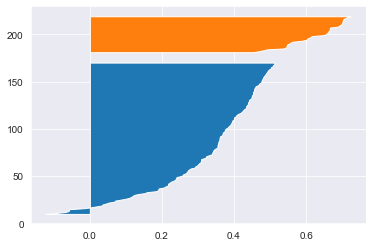

n_clusters: 3 & sscore: 0.4610481446570447


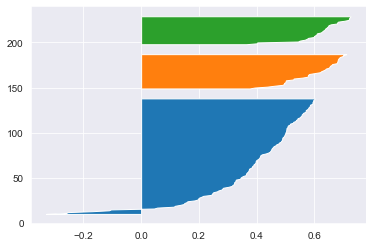

n_clusters: 4 & sscore: 0.4925507715349343


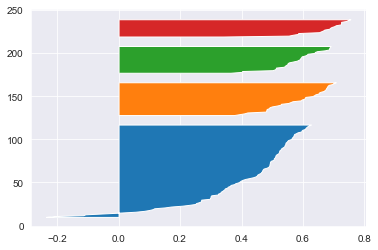

n_clusters: 5 & sscore: 0.5538089226688662


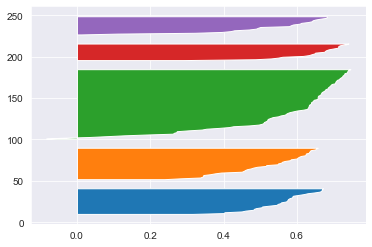

n_clusters: 6 & sscore: 0.5386761871036926


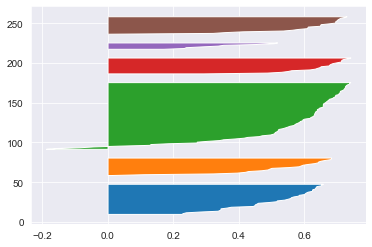

n_clusters: 7 & sscore: 0.5197949293475768


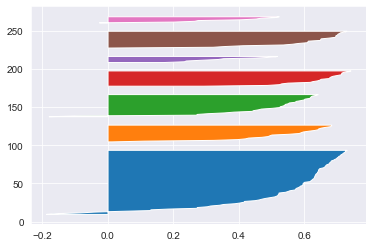

n_clusters: 8 & sscore: 0.4308617778221774


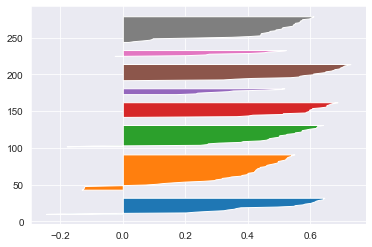

In [128]:
# evaluating model using by user define cluster
for k in range(2,9):
    agg=AgglomerativeClustering(n_clusters=k)
    df['cluster']=agg.fit_predict(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    sscore=silhouette_score(df[['Annual Income (k$)', 'Spending Score (1-100)']],df['cluster'])
    ssample=silhouette_samples(df[['Annual Income (k$)', 'Spending Score (1-100)']],df['cluster'])
    #print(sscore)
    #print(ssample) # Return sample score of all data points individually.
    
    ylow =10
    for cluster in range(agg.n_clusters):
        cluster_samples = ssample[df['cluster'] == cluster]
        cluster_samples.sort()
        yup =  ylow+ cluster_samples.shape[0]
        plt.fill_betweenx(np.arange(ylow, yup),0, cluster_samples) # np.arange(ylow, yup refers value of y and cluster_samples refers value of x
        ylow = yup+10
    print(f'n_clusters: {k} & sscore: {sscore}')
    plt.show()


In [129]:
# combinations, permutations
from itertools import combinations, permutations
ks = list(range(2, 9))
linkage = ('ward', 'single', 'complete','average')
list(combinations(ks, 2))

[(2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (5, 6),
 (5, 7),
 (5, 8),
 (6, 7),
 (6, 8),
 (7, 8)]

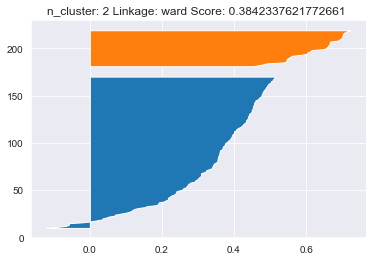

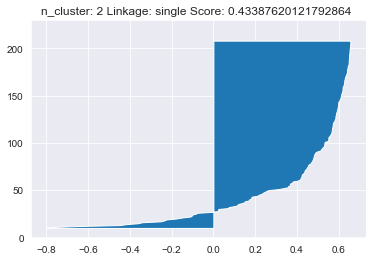

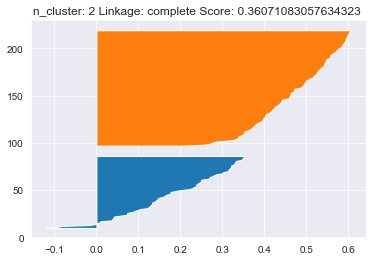

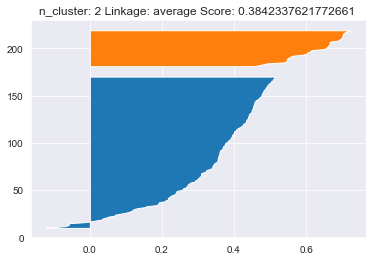

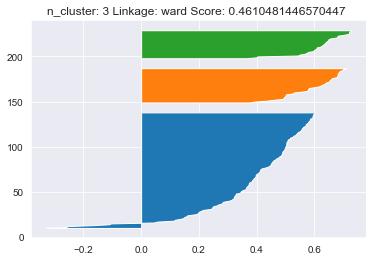

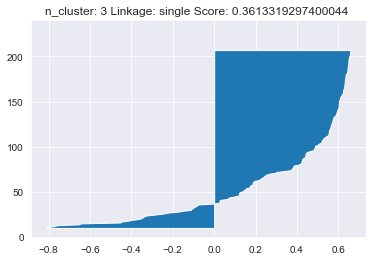

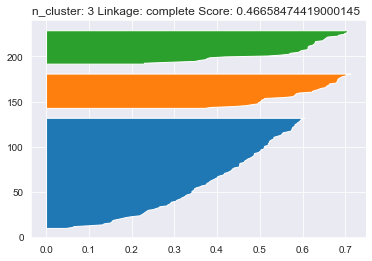

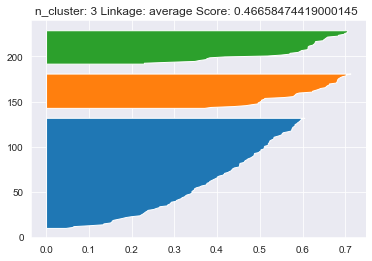

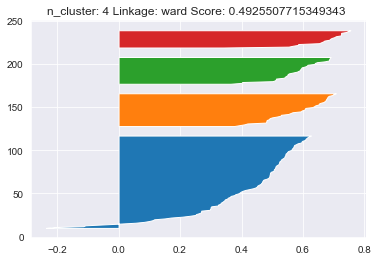

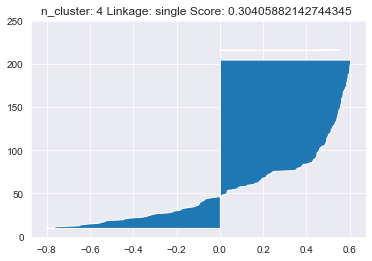

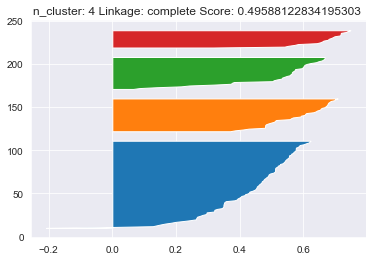

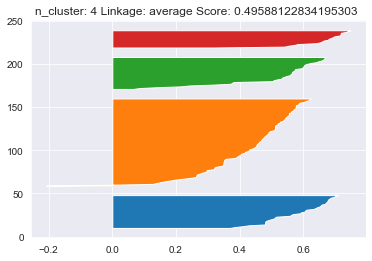

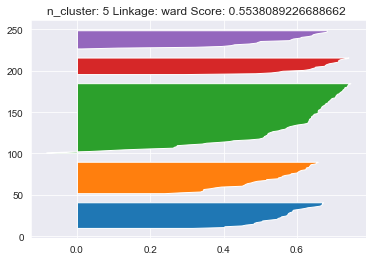

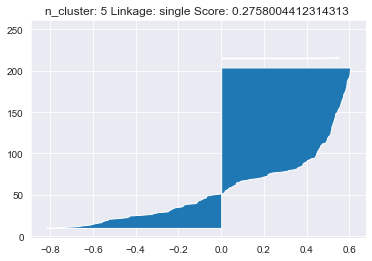

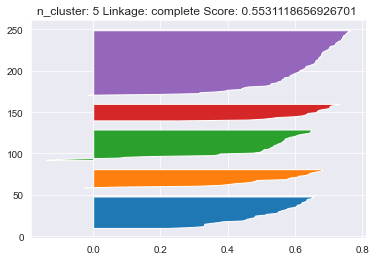

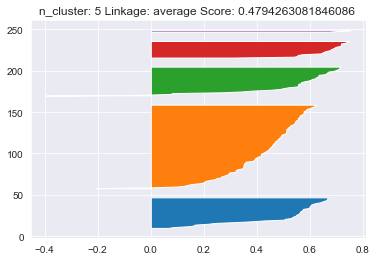

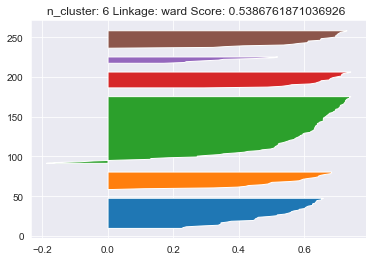

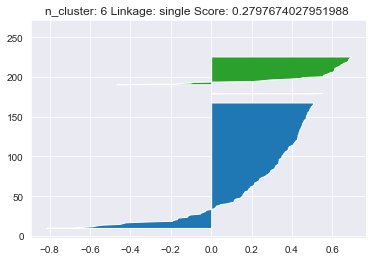

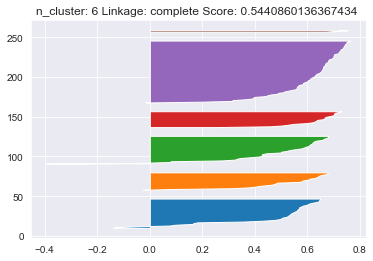

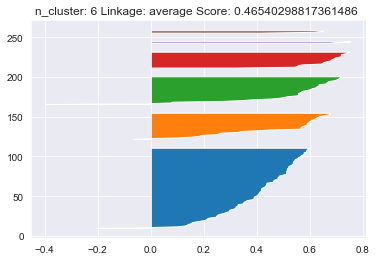

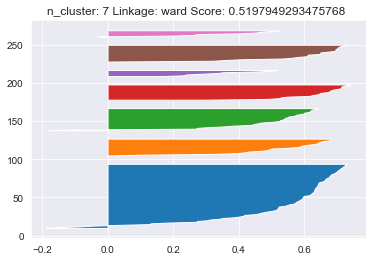

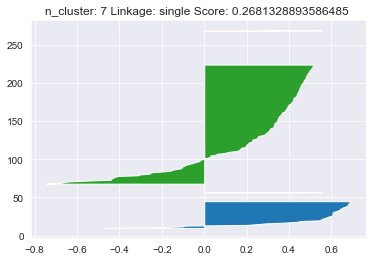

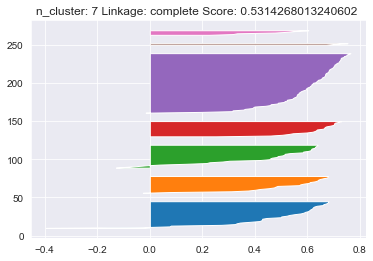

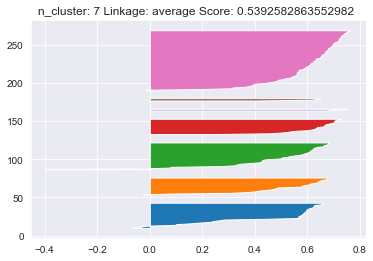

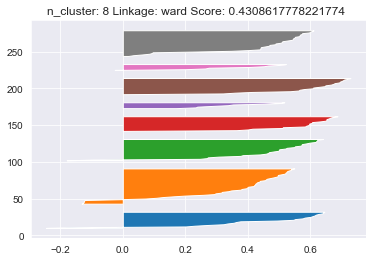

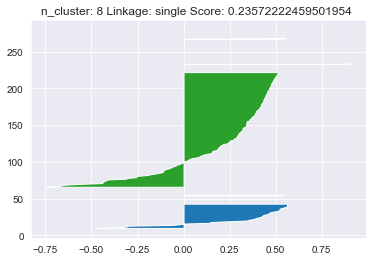

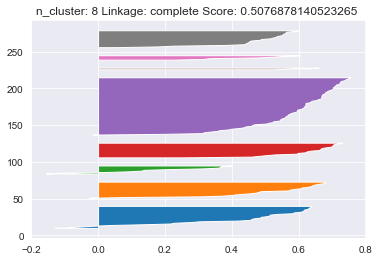

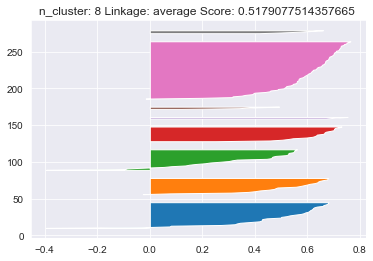

In [130]:
# # evaluating model parameter  using linkage and user define cluster
for k in ks:
    for link in linkage:
        agg = AgglomerativeClustering(n_clusters=k, linkage=link)
        df['Cluster'] = agg.fit_predict(df[['Annual Income (k$)', 'Spending Score (1-100)']])
        sscore = silhouette_score(df[['Annual Income (k$)', 'Spending Score (1-100)']], df['Cluster'])
        ssample = silhouette_samples(df[['Annual Income (k$)', 'Spending Score (1-100)']], df['Cluster'])
        ylow = 10
        for cluster in range(agg.n_clusters):
            cluster_samples = ssample[df['Cluster'] == cluster]
            cluster_samples.sort()
            yup = ylow + cluster_samples.shape[0]
            plt.fill_betweenx(np.arange(ylow, yup), 0, cluster_samples)
            ylow = yup + 10
        plt.title(f'n_cluster: {k} Linkage: {link} Score: {sscore} ')
        plt.show()

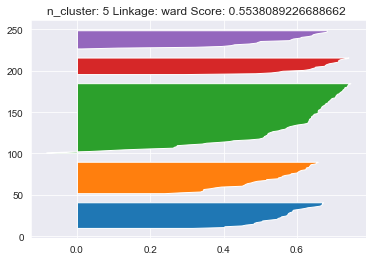

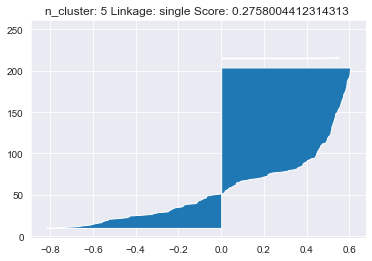

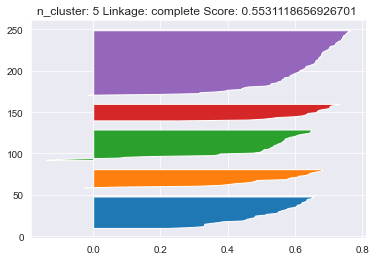

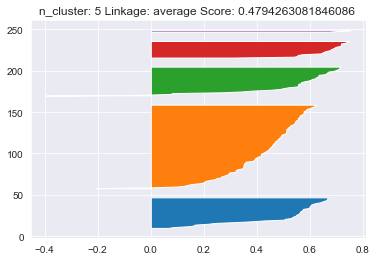

In [131]:
# evaluating best linkage and according to evaluated cluster=5
n_clusters=5
for link in linkage:
    agg = AgglomerativeClustering(n_clusters, linkage=link)
    df['Cluster'] = agg.fit_predict(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    sscore = silhouette_score(df[['Annual Income (k$)', 'Spending Score (1-100)']], df['Cluster'])
    ssample = silhouette_samples(df[['Annual Income (k$)', 'Spending Score (1-100)']], df['Cluster'])
    ylow = 10
    for cluster in range(agg.n_clusters):
        cluster_samples = ssample[df['Cluster'] == cluster]
        cluster_samples.sort()
        yup = ylow + cluster_samples.shape[0]
        plt.fill_betweenx(np.arange(ylow, yup), 0, cluster_samples)
        ylow = yup + 10
    plt.title(f'n_cluster: {n_clusters} Linkage: {link} Score: {sscore} ')
    plt.show()

  # <font color ='blue'> DBSCAN </font> 

DBSCAN - Density-Based Spatial Clustering of Applications with Noise. Finds core samples of high density and expands clusters from them. Good for data which contains clusters of similar density.

    | eps : float, default=0.5
The maximum distance between two samples for one to be considered as in the neighborhood of the other. This is not a maximum bound on the distances of points within a cluster. This is the most important DBSCAN parameter to choose appropriately for your data set and distance function.

    | min_samples : int, default=5
The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself.

    | metric : str, or callable, default='euclidean'
The metric to use when calculating distance between instances in a feature array. If metric is a string or callable, it must be one of the options allowed by :func:`sklearn.metrics.pairwise_distances` for its metric parameter.

In [132]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN()

    | Note: 
We cannot define the number of cluster in this algorithm
we can use silhouette_score for all algorithm

In [133]:

df['cluster'] = dbscan.fit_predict(df[['Annual Income (k$)', 'Spending Score (1-100)']])

In [134]:
df.cluster # here -1 refers noise points

CustomerID
1      0
2      0
3      0
4      0
5      0
      ..
196   -1
197   -1
198   -1
199   -1
200   -1
Name: cluster, Length: 200, dtype: int64

In [135]:
df.cluster.value_counts() # here two clusters have been occured 

 0    157
 1     35
-1      8
Name: cluster, dtype: int64

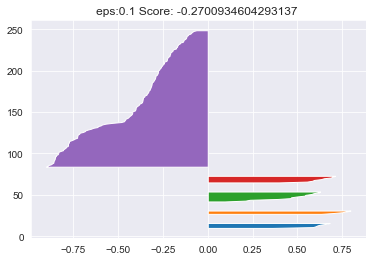

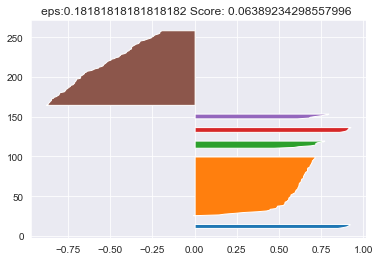

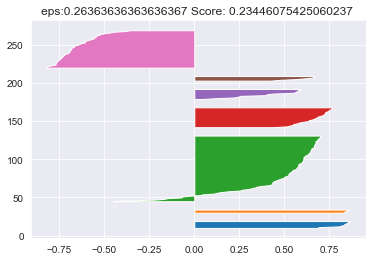

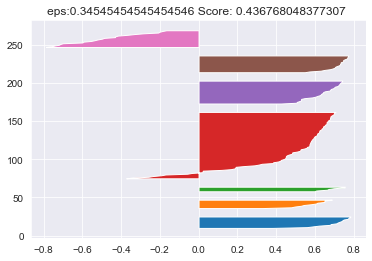

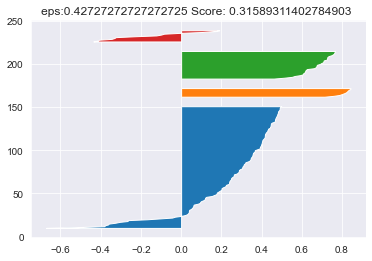

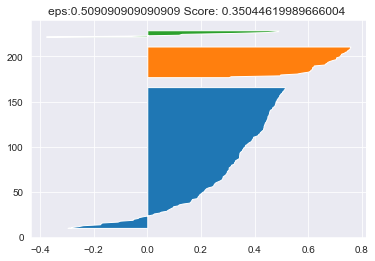

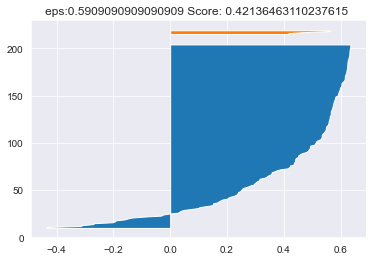

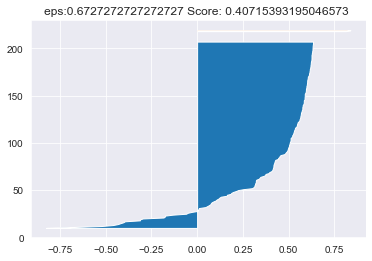

In [136]:
eps = np.linspace(0.1, 1.0, 12)
for e in eps:
    dbscan = DBSCAN(eps=e)
    df['Cluster'] = dbscan.fit_predict(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    no_clusters = len(set(dbscan.labels_))
    if no_clusters == 1:
        continue
    sscore = silhouette_score(df[['Annual Income (k$)', 'Spending Score (1-100)']], df['Cluster'])
    ssample = silhouette_samples(df[['Annual Income (k$)', 'Spending Score (1-100)']], df['Cluster'])
    ylow = 10
    for cluster in set(dbscan.labels_):
        cluster_samples = ssample[df['Cluster'] == cluster]
        cluster_samples.sort()
        yup = ylow + cluster_samples.shape[0]
        plt.fill_betweenx(np.arange(ylow, yup), 0, cluster_samples)
        ylow = yup + 10
    plt.title(f'eps:{e} Score: {sscore} ')
    plt.show()

In [137]:
set(dbscan.labels_)

{0}

In [138]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'cluster', 'Cluster'],
      dtype='object')